<a href="https://colab.research.google.com/github/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/blob/main/Logistic_Regression_Synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification

In [2]:
# data source: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction
# note: we have combined Training and Testing data from Kaggle into a single data frame
df = pd.read_csv('https://raw.githubusercontent.com/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/main/HW1/Heart_Disease_Prediction.csv')
df.columns = [c.replace(' ', '_') for c in df.columns] #Some columns names have spaces, here spaces are replaced by '_'

### Data Exploration

In [ ]:
# Viewing first rows of the dataset 
df.head()

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart_Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
# Lets check the number of entries and features (columns) of our data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest_pain_type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS_over_120             270 non-null    int64  
 6   EKG_results              270 non-null    int64  
 7   Max_HR                   270 non-null    int64  
 8   Exercise_angina          270 non-null    int64  
 9   ST_depression            270 non-null    float64
 10  Slope_of_ST              270 non-null    int64  
 11  Number_of_vessels_fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart_Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
# Checking data set size
df.shape

(270, 14)

In [ ]:
# Checking NaN values in the data
df.isna().sum()

Age                        0
Sex                        0
Chest_pain_type            0
BP                         0
Cholesterol                0
FBS_over_120               0
EKG_results                0
Max_HR                     0
Exercise_angina            0
ST_depression              0
Slope_of_ST                0
Number_of_vessels_fluro    0
Thallium                   0
Heart_Disease              0
dtype: int64

In [ ]:
# is the data imbalanced?
df.Heart_Disease.value_counts(normalize=True) #normalizes the result

# Data is not imbalanced

Absence     0.555556
Presence    0.444444
Name: Heart_Disease, dtype: float64

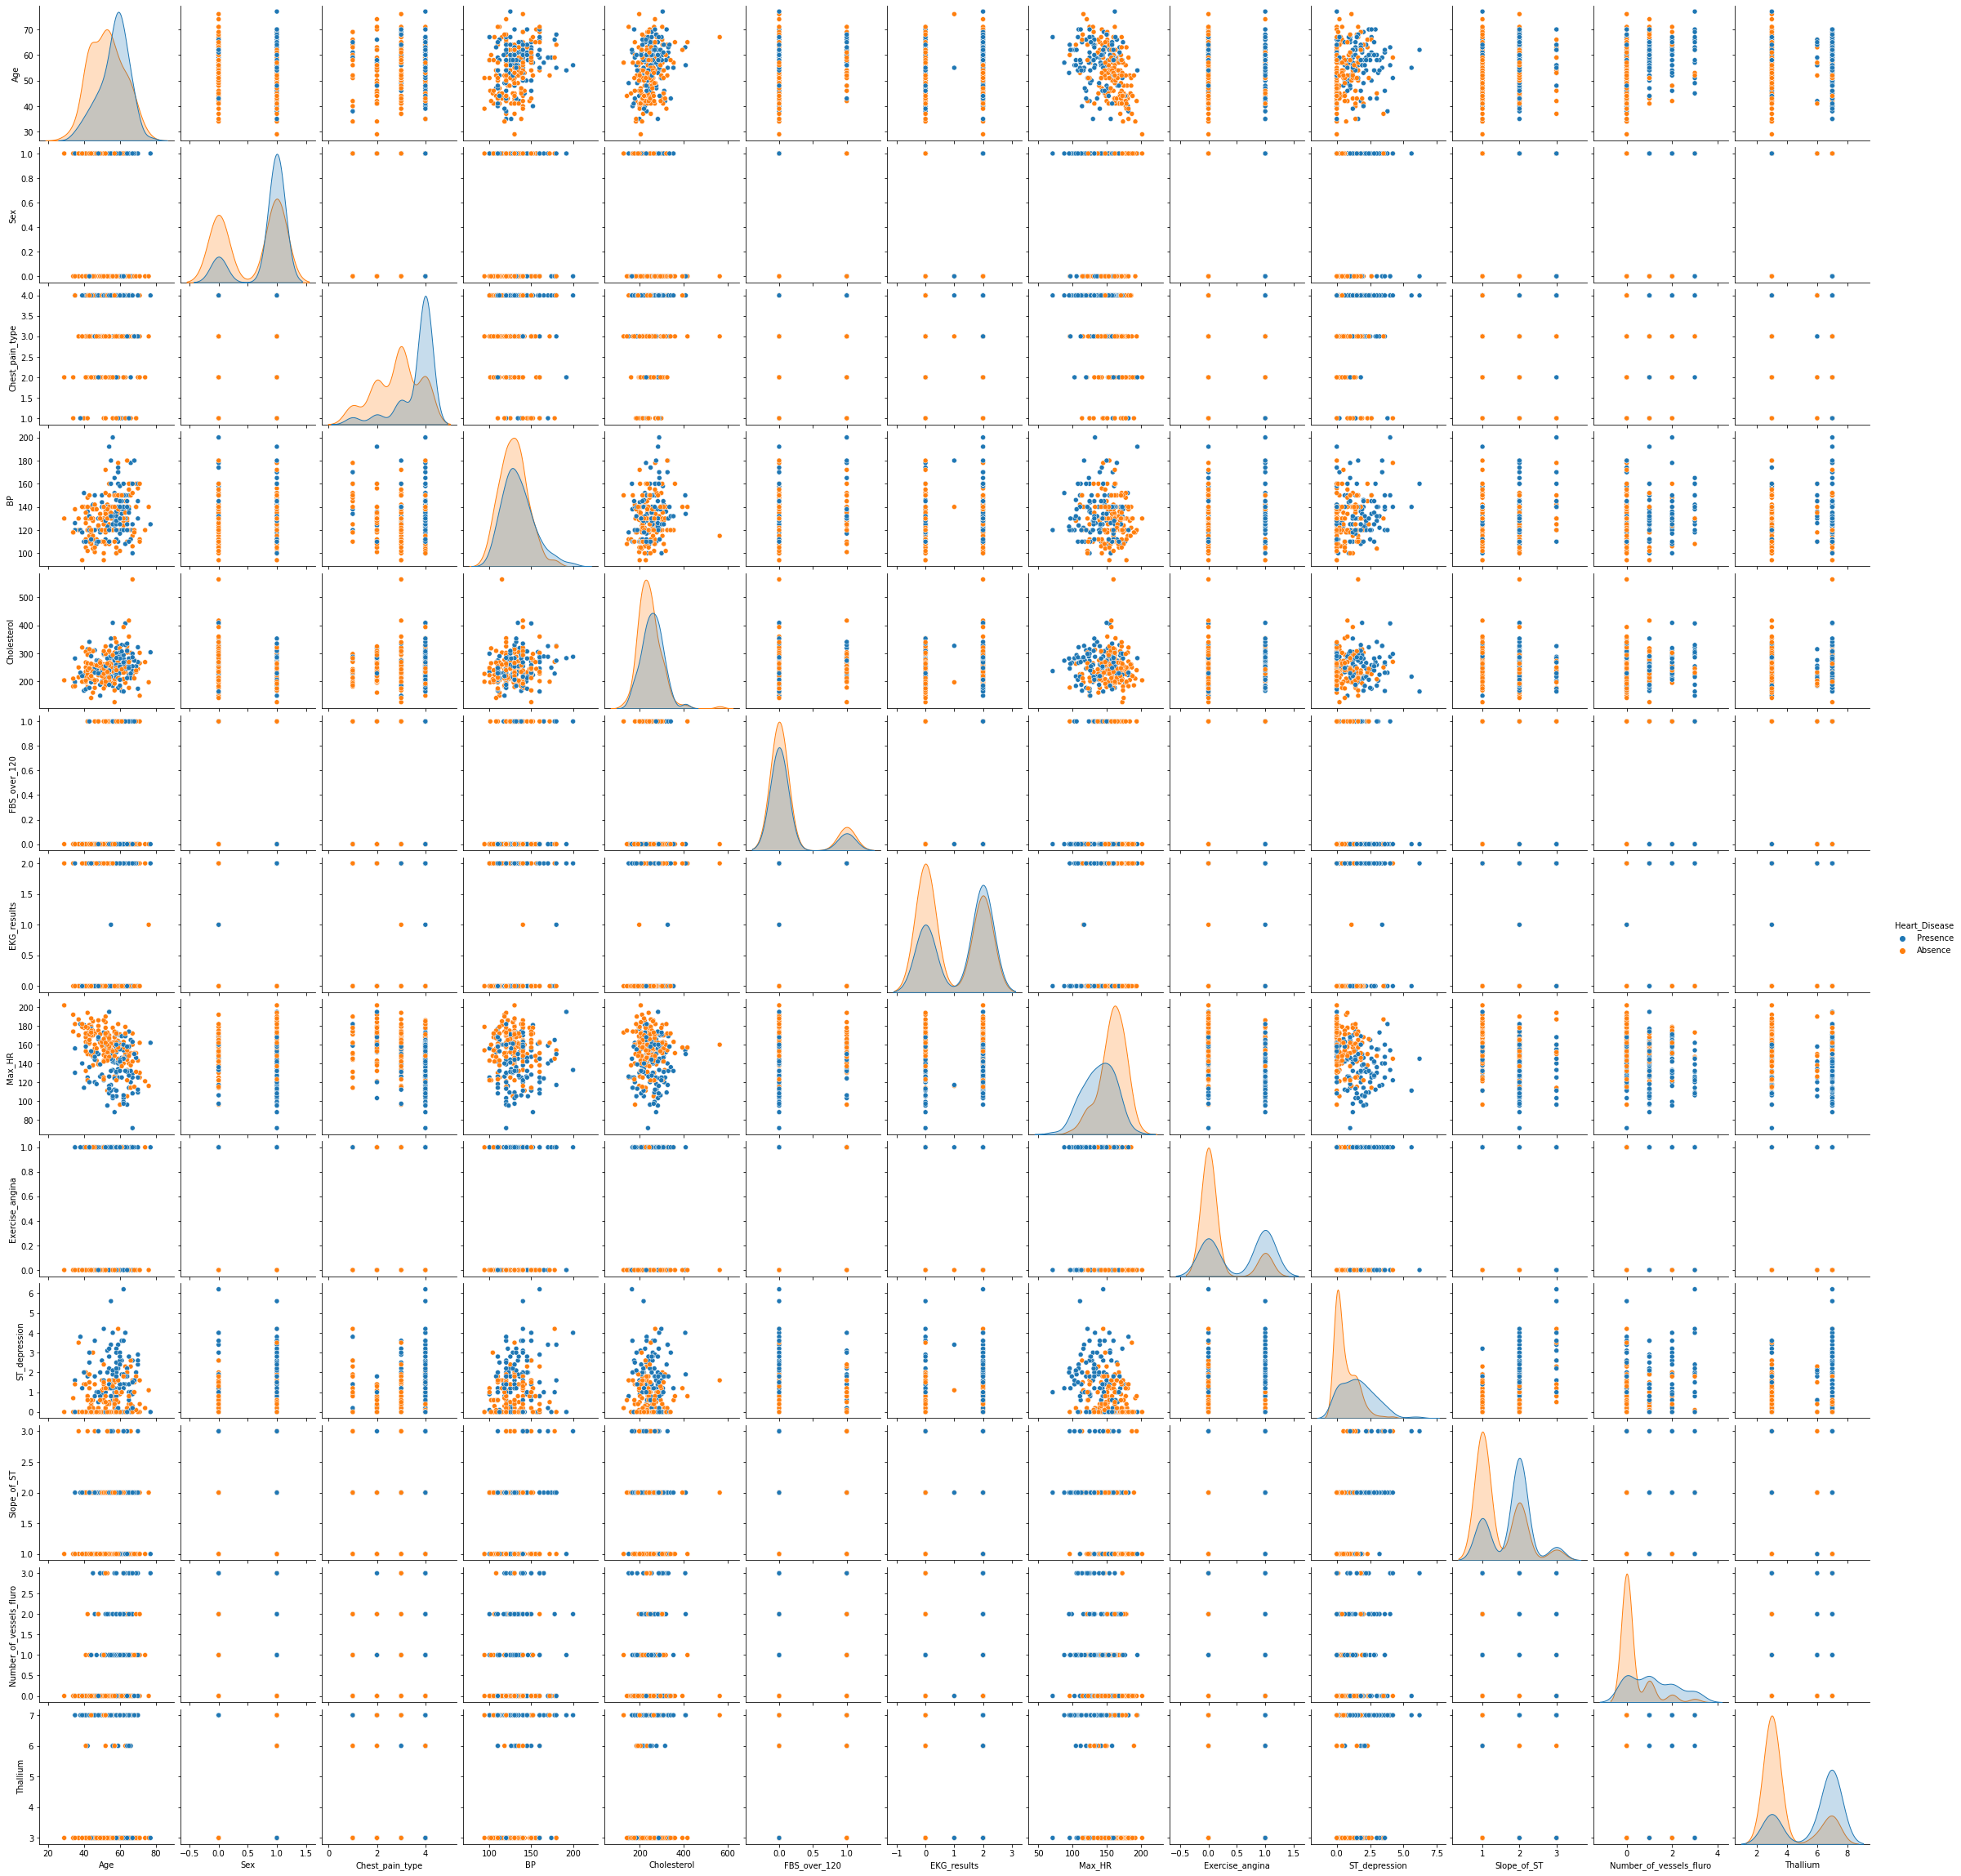

In [ ]:
# ploting pairwise relationships in the dataset
sns.pairplot(df, hue='Heart_Disease')

''

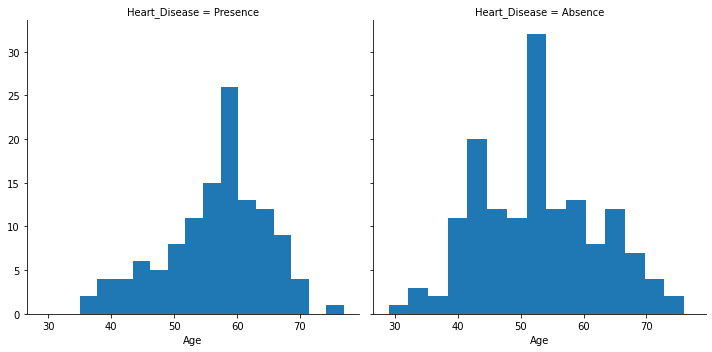

In [ ]:
# useful for visualizing the distribution of the data
g = sns.FacetGrid(df, col='Heart_Disease', height=5)
g.map(plt.hist, 'Age', bins=15)
,

In [ ]:
# useful for splitting the data into groups and aggregating them using different operators (e.g. sum or size)
# here we split dataset by Sex and get the size (i.e. count) for each group 
df.groupby('Sex').size()

Sex
0     87
1    183
dtype: int64

In [ ]:
# here we split dataset by Sex and get the mean value of other numeric variables for each group 
(df.groupby('Sex')).head()

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart_Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence
14,57,0,4,128,303,0,2,159,0,0.0,1,1,3,Absence
15,71,0,4,112,149,0,0,125,0,1.6,2,0,3,Absence


In [ ]:
# here we split dataset by Pclass and get the mean value of Survived for each group 
# (i.e. the probability of surviving for each Pclass group) 
df[['Sex', 'Heart_Disease']].groupby(['Sex'], as_index=False).mean().sort_values(by='Heart_Disease', ascending=False)

In [17]:
# First, let's define the sigmoid function for the logistic regression problem
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
# The parameters selection is based on the binary cross-entropy function 
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5 #infinitesimal value to avoid the indetermined operation log(0)
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon))) # Binary Cross Entropy Function
    return cost

In [14]:
# The optimization used in this case is bath gradiant descent. The learning rate 
# and number of interations are required here as inputs. 

def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        dum = (sigmoid(X @ params) - y)
        params = params - (learning_rate/m) * (X.T @ dum) #Updating parameters
        cost_history[i] = compute_cost(X, y, params) # saving cost historical values in a matrix

    return (cost_history, params)

In [ ]:
# Lets define a predict function for new X input data using the optimal parameters
def predict(X, params):
    return np.round(sigmoid(X @ params))

In [ ]:
m = len(y)
X = np.hstack((np.ones((m,1)),X))
print(y.shape)
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1
learning_rate = 0.001

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = mini_batch_gradient_descent(X, y, params, learning_rate, 
                                                             iterations,mbs=50)

fig = plt.figure()
plt.xlim(0, 1000)
plt.ylim(0,50)
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()



In [81]:
# The optimization used in this case is mini batch gradiant descent. The learning rate 
# and number of interations are required here as inputs. 

def mini_batch_gradient_descent(X, y, params, learning_rate, iterations,mbs):
    m = len(y)
    cost_history = np.zeros((iterations,1))
    n_batches = int(m/mbs)
    for j in range(iterations):
        cost_i = 0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,mbs):
            X_i = X[i:i+mbs]
            y_i = y[i:i+mbs]
            dum = (sigmoid(X_i @ params) - y_i)
            params = params - (learning_rate/m) * (X_i.T @ dum) #Updating parameters
            cost_i += compute_cost(X_i, y_i, params) # saving cost historical values in a matrix
        cost_history[j] = cost_i
    return (cost_history, params)

In [50]:
# data source: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction
# note: we have combined Training and Testing data from Kaggle into a single data frame
df = pd.read_csv('https://raw.githubusercontent.com/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/main/HW1/Heart_Disease_Prediction.csv')
df.columns = [c.replace(' ', '_') for c in df.columns] #Some columns names have spaces, here spaces are replaced by '_'
mapping = {'Presence': 1, 'Absence': 0}

df = df.replace({'Heart_Disease': mapping})
y = df['Heart_Disease']
X = df[['Age', 'Sex', 'Chest_pain_type', 'BP', 'Cholesterol', 'FBS_over_120','EKG_results', 'Max_HR', 'Exercise_angina', 'ST_depression','Slope_of_ST', 'Number_of_vessels_fluro', 'Thallium']]
m = len(y)
n = np.size(X,1)
X = np.hstack((np.ones((m,1)),X))
y = y[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]


(5000, 1)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


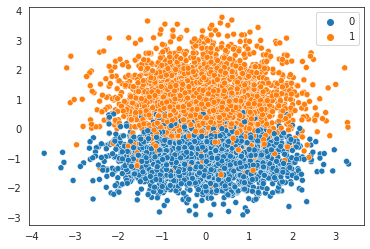

In [93]:
X, y = make_classification(n_samples=5000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]
print(y.shape)
sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

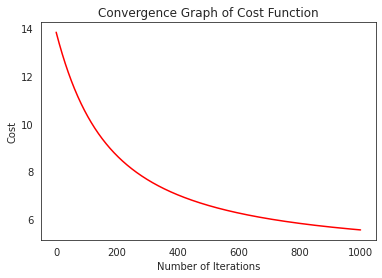

In [99]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1))
iterations = 1000
learning_rate =0.01

initial_cost = compute_cost(X, y, params)


(cost_history, params_optimal) = mini_batch_gradient_descent(X, y, params, 
                                 learning_rate, iterations,mbs = 250)

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

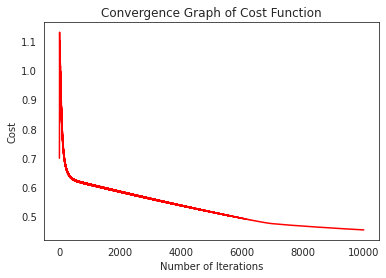

In [90]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1))
iterations = 10000
learning_rate =0.0001

initial_cost = compute_cost(X, y, params)


(cost_history, params_optimal) = gradient_descent(X, y, params, 
                                 learning_rate, iterations)

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [7]:
X[0:4]


array([[1.00e+00, 7.00e+01, 1.00e+00, 4.00e+00, 1.30e+02, 3.22e+02,
        0.00e+00, 2.00e+00, 1.09e+02, 0.00e+00, 2.40e+00, 2.00e+00,
        3.00e+00, 3.00e+00],
       [1.00e+00, 6.70e+01, 0.00e+00, 3.00e+00, 1.15e+02, 5.64e+02,
        0.00e+00, 2.00e+00, 1.60e+02, 0.00e+00, 1.60e+00, 2.00e+00,
        0.00e+00, 7.00e+00],
       [1.00e+00, 5.70e+01, 1.00e+00, 2.00e+00, 1.24e+02, 2.61e+02,
        0.00e+00, 0.00e+00, 1.41e+02, 0.00e+00, 3.00e-01, 1.00e+00,
        0.00e+00, 7.00e+00],
       [1.00e+00, 6.40e+01, 1.00e+00, 4.00e+00, 1.28e+02, 2.63e+02,
        0.00e+00, 0.00e+00, 1.05e+02, 1.00e+00, 2.00e-01, 2.00e+00,
        1.00e+00, 7.00e+00]])

In [ ]:
m = len(y)
n = np.size(X,1)
params = 100*np.ones((n,1))
print(params)
iterations = 900000
learning_rate = 0.001

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/main/HW1/smoke_detection_iot.csv')

df.columns = [c.replace(' ', '_') for c in df.columns] #Some columns names have spaces, here spaces are replaced by '_'
df.drop(['Unnamed:_0', 'UTC'],inplace=True, axis=1)
df.columns
y = df['Fire_Alarm']
X = df[['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw_H2',
       'Raw_Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT']]

m = len(y)
n = np.size(X,1)
X = np.hstack((np.ones((m,1)),X))
y = y[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
